In [11]:
# General
import numpy as np

from qiskit_aer.noise import depolarizing_error

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer.primitives import EstimatorV2 as Estimator 

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

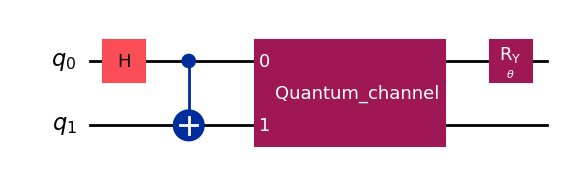

In [ ]:
theta = Parameter("$\\theta$")

chsh_circuit = QuantumCircuit(2)
chsh_circuit.h(0)
chsh_circuit.cx(0, 1)

depol_channel = depolarizing_error(0.1, 2)
chsh_circuit.append(depol_channel, [0, 1])

chsh_circuit.ry(theta, 0)
chsh_circuit.draw(output="mpl", idle_wires=False, style="iqp")

In [ ]:
number_of_phases = 21
phases = np.linspace(0, 2 * np.pi, number_of_phases)
# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

In [14]:
# <CHSH1> = <AB> - <Ab> + <aB> + <ab> -> <ZZ> - <ZX> + <XZ> + <XX>
observable1 = SparsePauliOp.from_list(
    [("ZZ", 1), ("ZX", -1), ("XZ", 1), ("XX", 1)]
)
 
# <CHSH2> = <AB> + <Ab> - <aB> + <ab> -> <ZZ> + <ZX> - <XZ> + <XX>
observable2 = SparsePauliOp.from_list(
    [("ZZ", 1), ("ZX", 1), ("XZ", -1), ("XX", 1)]
)


In [15]:
# To run on a local simulator:
# Use the StatevectorEstimator from qiskit.primitives instead.
 
estimator = Estimator()
 
pub = (
    chsh_circuit,  # ISA circuit
    [[observable1], [observable2]],  # ISA Observables
    individual_phases,  # Parameter values
)
 
job_result = estimator.run(pubs=[pub]).result()

In [ ]:
chsh2_est = job_result[0].data.evs[1]

print(chsh2_est)

[2.54558441]


ValueError: x and y must have same first dimension, but have shapes (21,) and (1,)

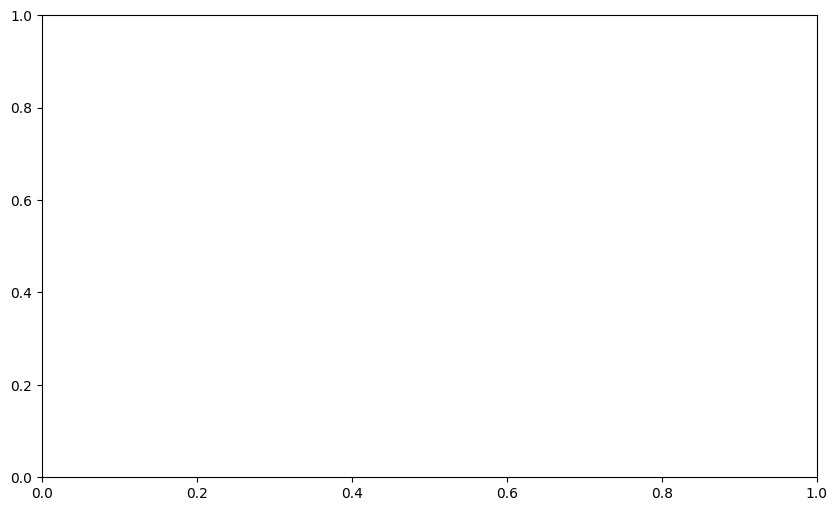

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
 
# results from hardware
ax.plot(phases / np.pi, chsh1_est, "o-", label="CHSH1", zorder=3)
ax.plot(phases / np.pi, chsh2_est, "o-", label="CHSH2", zorder=3)
 
# classical bound +-2
ax.axhline(y=2, color="0.9", linestyle="--")
ax.axhline(y=-2, color="0.9", linestyle="--")
 
# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.axhline(y=-np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.fill_between(phases / np.pi, 2, 2 * np.sqrt(2), color="0.6", alpha=0.7)
ax.fill_between(phases / np.pi, -2, -2 * np.sqrt(2), color="0.6", alpha=0.7)
 
# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\\pi$"))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
 
# set labels, and legend
plt.xlabel("Theta")
plt.ylabel("CHSH witness")
plt.legend()
plt.show()

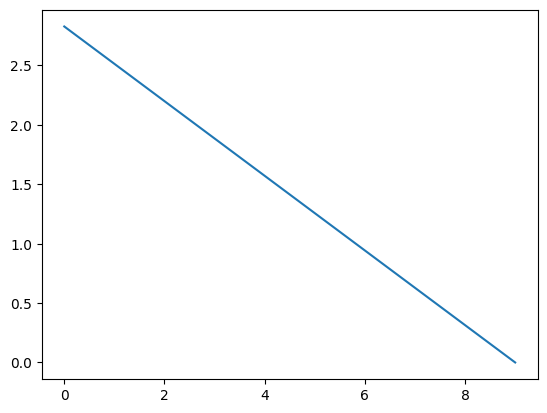

In [21]:
individual_phases = [np.pi/4]

# <CHSH2> = <AB> + <Ab> - <aB> + <ab> -> <ZZ> + <ZX> - <XZ> + <XX>
observable2 = SparsePauliOp.from_list(
    [("ZZ", 1), ("ZX", 1), ("XZ", -1), ("XX", 1)]
)

estimator = Estimator()

CHSH_values = []

for depolarization_rate in np.linspace(0,1,10):

    chsh_circuit = QuantumCircuit(2)
    chsh_circuit.h(0)
    chsh_circuit.cx(0, 1)

    depol_channel = depolarizing_error(depolarization_rate, 2)
    chsh_circuit.append(depol_channel, [0, 1])

    chsh_circuit.ry(theta, 0)
 
    pub = (
        chsh_circuit,  # ISA circuit
        [[observable2]],  # ISA Observables
        individual_phases,  # Parameter values
    )
    
    job_result = estimator.run(pubs=[pub]).result()

    CHSH_values.append(job_result[0].data.evs[0][0])

plt.plot(CHSH_values)